<div class='alert alert-block alert-info'><h1>Easy WordCloud with Python</h1></div>

In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

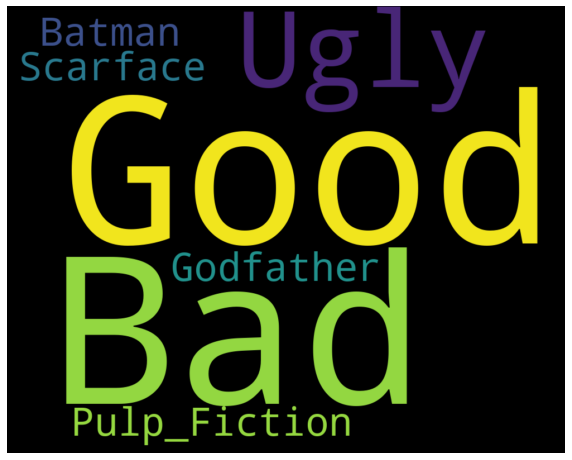

In [2]:
plt.figure(figsize=(10,10))
text='good the bad and the ugly pulp_fiction Batman Godfather Scarface'.title()
WC=WordCloud(width=1000,height=800,max_words=500,min_font_size=5)
words=WC.generate(text)
plt.imshow(words,interpolation='bilinear')
plt.axis('off')
plt.show()

In [3]:
# with open('loseyourself.txt') as f:
#     song = f.readlines()

# song = ' '.join(song)
# song

<div class='alert alert-block alert-info'><h1> WordCloud of Whatsapp Chat with Python</h1></div>

In [4]:
import pandas as pd 
import nltk

In [5]:
df = pd.read_csv(r'D:\Projects\NLP\projects\whatsapp\cleaned_vivek.txt',
                 names=['date','time','sender','message'],skiprows=1, encoding='utf-8')

In [6]:
df.head()

,date,time,sender,message
0,8/9/19,15:18,kunalduran13,Ni lg rha
1,8/10/19,18:26,kunalduran13,Ruk yr
2,8/10/19,18:26,kunalduran13,Raat ko krta hu
3,8/10/19,19:22,Vivek,K
4,8/12/19,13:35,kunalduran13,15 ko aa rha hu


In [7]:
df.shape

(1178, 4)

In [8]:
df.isnull().sum()

date       0
time       0
sender     0
message    0
dtype: int64

In [9]:
new_df = df[(df.message != '<Media omitted>')]
new_df = new_df.dropna()

In [10]:
raw = []
for word in new_df.message:
    token = nltk.word_tokenize(str(word).lower())
    raw.extend(token)

fdist = nltk.FreqDist(raw)

In [11]:
stopwords = set(['han',\
 '.','ni','nahi','toh','to', 'phir', 'abhi','hi','he',\
 'kar', 'Ye', 'se','kuch', 'ki','are','aur',\
 ',', '?', 'ko',  'h', 'hai', 'ho', \
 '😅', 'ka', 'k', 'ab', 'kya', 'tha', 'm', 'bhi', 'rhi','thi','rha',])

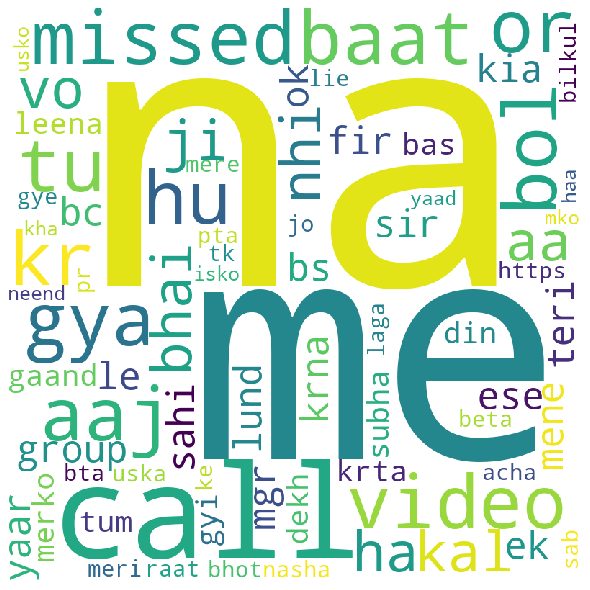

In [31]:
words_for_wordcloud = ' '.join([w[0] for w in fdist.most_common(100)])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords=stopwords,min_font_size = 10).generate(words_for_wordcloud) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()  

<div class='alert alert-block alert-info'><h1> Exploratory Data Analysis of Whatsapp Chat with Python</h1></div>

### How much message did you send ?  How much message did other person send ?

In [13]:
new_df.sender.value_counts()

Vivek           580
kunalduran13    225
Name: sender, dtype: int64

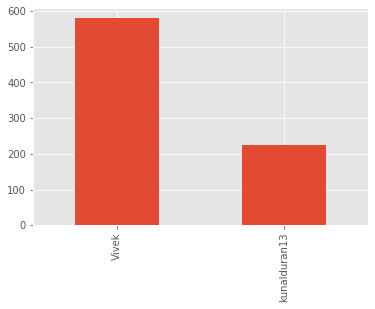

In [14]:
plt.style.use('ggplot')
new_df.sender.value_counts().plot(kind='bar')

In [15]:
msg_count = new_df.sender.value_counts()
print(msg_count.index)
msg_percent = (msg_count*100)/msg_count.sum()
msg_percent

Index(['Vivek', 'kunalduran13'], dtype='object')


Vivek           72.049689
kunalduran13    27.950311
Name: sender, dtype: float64

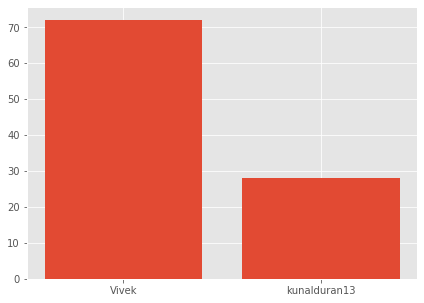

In [16]:
plt.figure(figsize=(7,5))
plt.bar(msg_count.index,msg_percent)
plt.show()

### Checking data type of columns

In [17]:
new_df.dtypes

date       object
time       object
sender     object
message    object
dtype: object

### Converting date column to datetime

In [18]:
test = new_df.copy()

test['date'] = test.date.apply(lambda x: x[:-2]+'20'+x[-2:])

test['date'] = pd.to_datetime(test['date'], format='%m/%d/%Y')

### How many messages on particular date or month

In [19]:
test[(test.date.dt.month==2) & (test.date.dt.day==2)].tail()

,date,time,sender,message


### Searching specific message by keyword

In [30]:
# new_df[new_df.message.str.contains('cricket')]


# put spaces around to find particular word
new_df[new_df.message.str.contains('gaana')]

,date,time,sender,message
306,10/29/19,23:55,Vivek,Life me kabhi na na na na wala gaana bhi nahi ...
512,11/28/19,21:19,Vivek,Ye nahi aata gaana mgr shyd ghaayal
